In [1]:
import math
from collections import OrderedDict

# data analysis and wrangling
import pandas as pd
from pandas_datareader import data
import numpy as np
import random as rnd
import datetime

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()

# web scraping
import requests
import bs4
import csv
import json 
import re
from io import StringIO

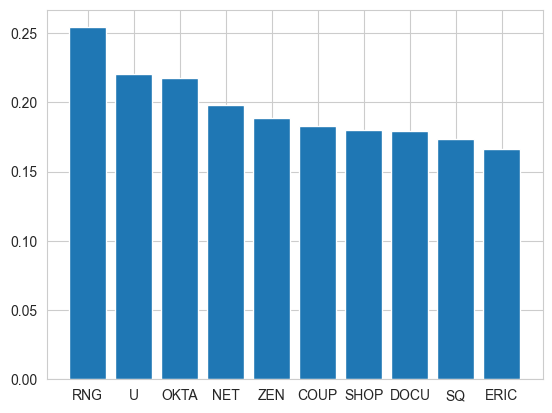

In [3]:
stock_list = ['AAPL','MSFT','TSM','NVDA','CRM','ADBE','INTC','ASML','CSCO','ORCL','QCOM','AVGO','ACN','TXN','SAP','SHOP',
'IBM','AMD','NOW','SQ','FIS','INTU','UBER','FISV','AMAT','MU','INFY','LRCX','VMW','ADSK','TEAM','DELL','ADI','WDAY',
'NXPI','CTSH','ERIC','DOCU','PLTR','KLAC','APH','TEL','U','MCHP','STM','SNPS','CRWD','SPLK','CDNS','MRVL','OKTA',
'HPQ','MSI','PANW','GLW','DDOG','ANSS','WIT','RNG','FTV','PAYC','SWKS','COUP','VRSN','GRMN','KEYS','FLT',
'NET','ANET','CAJ','ZBRA','ZS','FTNT','EPAM','CDW','GIB','TER','SSNC','ZI','UMC','BR','HUBS','QRVO','CHKP','AKAM','TYL',
'UI','ZEN','CTXS','TRMB','AVLR','STX']
# stock_list = ['MSFT', 'AAPL']

std = {}

for name in stock_list:
    # read files
    fname = r"C:\IIT\DS203\Project\New_Data\2022 Data\\" + name + ".csv"
    df = pd.read_csv(fname)

    # using open price to calculate standard deviation
    open_price = df["Open"]
    std[name] = math.sqrt(np.var(open_price))

    # normalising standard deviation
    temp = df.iloc[0,1]
    std[name] = std[name]/temp
 
# get hold of names and values of dictionary 
names = list(std.keys())
values = list(std.values())

# sort descending to get most volatile companies
for i in range(len(values)):
    for j in range(0, len(values) - i - 1):
      if values[j] < values[j + 1]:
        temp = values[j]
        values[j] = values[j+1]
        values[j+1] = temp
        tem = names[j]
        names[j] = names[j+1]
        names[j+1] = tem

# getting hold of top 10
top_values = []
top_names = []
for i in range(10):
    top_values.append(values[i])
    top_names.append(names[i])

# plotting bar
plt.bar(range(len(top_values)), top_values, tick_label=top_names)
plt.show()
